<h1>Содержание сборного проекта по анализу приложения рынка общественного питания<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Выдвижение-и-проверка-гипотез" data-toc-modified-id="Выдвижение-и-проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выдвижение и проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование 

Определить целесообразность и возможность изменить шрифт в приложении на основе выделенных 3х групп данных, выраженных в логах действий.

- Цель: 
 доказать или опровергнуть необходимость (возможность) изменить шрифт для приложения
- Задачи: 
1. Изучить и подготовить данные 
2. Исследовать воронку событий 
3. Изучить результаты экспериментов 
4. Проверить гипотезы 

## Изучение данных из файла

Импортируем библиотеки

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from scipy import stats as st
import math
import warnings
from scipy.stats import levene
import seaborn as sns
from numpy import median
import sys
!{sys.executable} -m pip install plotly
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly as pl
from plotly import graph_objects as go
from random import randint
from statsmodels.stats import weightstats as stests
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/mugls4thvy3q719/logs_exp.csv?dl=1', sep = '\t',skiprows = 0)

рассмотрим первые 10 строк данных.

In [3]:
display(df.head(5))

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


данные "слиплись". Разделим с помощью аттрибута sep.

рассмотрим информацию о датасете


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


### Вывод

Фрейм с 4мя полями. Типы данных = object, int64. Поле Timedelta предположительно в unix формате

## Предобработка данных

Пропущенных значений нет. Теперь заменим названия столбцов.

In [5]:
df.rename(columns={'EventName': 'event_name', 'DeviceIDHash':'user_id', 'EventTimestamp':'event_time', 'ExpId':'experiment_group'}, inplace = True)


проверим фрейм на пропуски

In [6]:
print('в данных', df.isna().sum(axis=1).sum(), 'пропусков')

в данных 0 пропусков


проверим поля данных на корректность:

In [7]:
print(df['event_name'].value_counts()) #оценим возможные исследуемые события

print(df['user_id'].value_counts()) #оценим число уникальных пользователей

print(df['experiment_group'].value_counts()) #ищем иные, кроме 246, 247,248 группы

print(df['event_time'].describe()) #смотрим минимальные и максимальные значения


MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64
6304868067479728361    2308
197027893265565660     2003
4623191541214045580    1771
6932517045703054087    1448
1754140665440434215    1222
                       ... 
8188293597840107588       1
1616856457908967248       1
732356052255400077        1
6671109879025379318       1
2275878174127603404       1
Name: user_id, Length: 7551, dtype: int64
248    85747
246    80304
247    78075
Name: experiment_group, dtype: int64
count    2.441260e+05
mean     1.564914e+09
std      1.771343e+05
min      1.564030e+09
25%      1.564757e+09
50%      1.564919e+09
75%      1.565075e+09
max      1.565213e+09
Name: event_time, dtype: float64


Удалим дубликаты 

In [8]:
df = df.drop_duplicates()

### Вывод

Данные адекватны, дубликаты удалены. Можно добавлять поля и менять типы данных в поле Timestamp. Unix преобразуем в привычный вид даты


## Расчёты и добавление результатов в таблицу

Добавляем столбцы с форматами: дата с временем, чистая дата

In [9]:
df['event_time_dt'] = pd.to_datetime(df['event_time'], unit='s', origin='unix') 
df['event_date'] = df['event_time_dt'].dt.date #добавляем дату

 #меняем unix на дату с временем

Исследуем количество событий в логе

In [10]:
print('Всего в логе', df.count()[1], 'событий')

Всего в логе 243713 событий


Определим число пользователей в логе

In [11]:
print('всего в логе', df['user_id'].nunique(), 'пользователей')

всего в логе 7551 пользователей


Рассчитаем среднее количество событий на опльзователя

In [12]:
print('в среднем на одного пользователя', '{:.2f}'.format(df.count()[1]/df['user_id'].nunique()), 'событий')

в среднем на одного пользователя 32.28 событий


Определим период, за который мы располагаем данными

In [13]:
df['event_time_dt'].max() - df['event_time_dt'].min()

Timedelta('13 days 16:31:41')

Исходя из первичной проверки, в нашем распоряжении данные за 13 дней, 16 часов, 31 минута и 41 секунда. Построим гистограмму

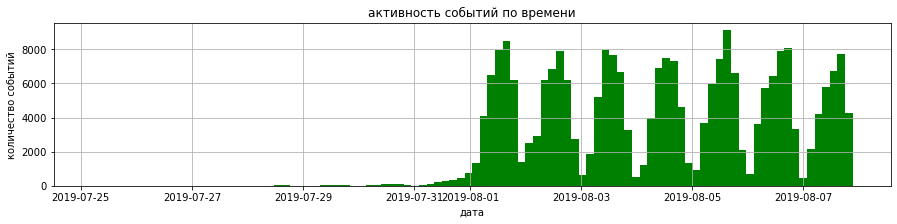

In [14]:
plt.figure(figsize = (15,3))
df['event_time_dt'].hist(bins = 100, color = 'green')
plt.title('активность событий по времени')
plt.xlabel("дата")    
plt.ylabel("количество событий") 
plt.show()

Очевидно, что основная активность начинается с 1 го августа 2019 года. Видим, что срезан хвост у последнего пика активности. Однако данные нужно обрезать. Примем за начало активности 1е августа, за окончание 7е включительно, проверим это с помощью поля с датами.

In [15]:
df['event_date'].value_counts()

2019-08-01    36141
2019-08-05    36058
2019-08-06    35788
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-07    31096
2019-07-31     2030
2019-07-30      412
2019-07-29      184
2019-07-28      105
2019-07-27       55
2019-07-26       31
2019-07-25        9
Name: event_date, dtype: int64

Фактически мы обладаем данными за неделю. Фрейм наполовину пуст, или наполовину полон. Определим количество и процент потерянных событий и польозвателей.

In [16]:
df_lost = df[df['event_date']<pd.Timestamp(2019,7,31)]
df = df[df['event_date']>pd.Timestamp(2019,7,31)]

In [17]:
print('Всего потеряли', df_lost.count()[1], 'событий и', df_lost['user_id'].nunique(), 'пользователей')

Всего потеряли 796 событий и 555 пользователей


Проверим, остались ли пользователи всех трёх исследуемых групп экспериментов

In [18]:
df.groupby('experiment_group')['user_id'].nunique()

experiment_group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

In [19]:
df_lost.groupby('experiment_group')['user_id'].nunique() #рассмотрим отброшенных уникальных юзеров

experiment_group
246    185
247    182
248    188
Name: user_id, dtype: int64

в целом - все пользователи остались. Пользователи равномерно отвалились от всех трёх групп.

### Вывод

Данные отфильтрованы и готовы к анализу. В масштабах данных, потеряли относительно небольшую часть, что позволяет провести полноценный анализ. Визуализация частоты событий по времени после фильтрации представлена на графике (ниже)

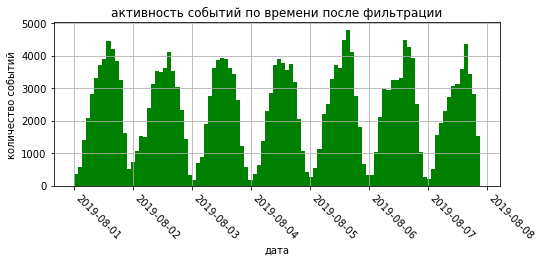

In [20]:
plt.figure(figsize = (8,3))
df['event_time_dt'].hist(bins = 100, color = 'green')
plt.title('активность событий по времени после фильтрации')
plt.xlabel("дата")    
plt.ylabel("количество событий")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.show()

## Исследовательский и статистический анализ данных

Рассмотрим варианты событий в логах с сортировкой. Для этого вызовем метод value_counts 

In [21]:
funn = df.groupby('event_name')['user_id'].nunique()
funn = funn[funn.index != 'Tutorial']

Итак, события исходя из фрейма могут быть следующими: 
1. Появление главного экрана
2. Скрин оффера
3. Появление скрина оплаты
4. Скрин успешной оплаты
5. Туториал

Судя по сортировке - всё выстраивается в классическую воронку за исключением Туториала, очевидно это ответвление от воронки. Возможно данные по Туториалу пригодятся для расчёта других метрик, но к воронке отношения не имеют. Поэтому воронка будет выглядеть следующим образом:


In [22]:
funn = funn.to_frame().reset_index().sort_values(by= 'user_id', ascending = False)


In [23]:
funn 

,event_name,user_id
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539


In [24]:
plt.figure(figsize = (4,2))

fig = go.Figure(
    go.Funnel(
        y=['Появление главного экрана','Скрин оффера','Появление скрина оплаты','Скрин успешной оплаты'],
        x=funn['user_id']))

fig.show() 

<Figure size 288x144 with 0 Axes>

***Из графика видно (при наведении на соответствующий блок)***, что больше всего теряется на этапе перехода от главного экрана на скрин оффера (отваливаются более 60%), однако до оплаты доходят 28,9% от увидевших главный экран.

Перед проведением А/A тестирования убедимся, что число объектов исследования в контрольных группах 246 и 247 отличается не больше чем на 1 %

In [25]:
df.groupby('experiment_group')['user_id'].nunique()[[246]].to_list()[0] / df.groupby('experiment_group')['user_id'].nunique()[[247]].to_list()[0] 

0.9884600079586152

число объектов в данных отличается более чем на 1%. Для приведенные в соответствие удалим случайные строки из группы 247. Для этого необходимо удалить 5 пользователей, случайным образом

In [26]:
#проводим z тест на определение вероятности тождества двух выборок

df_old_font_246 = df[df['experiment_group'] == 246].groupby('experiment_group')['user_id'].value_counts()
df_old_font_247 = df[df['experiment_group'] == 247].groupby('experiment_group')['user_id'].value_counts()

ztest ,pval1 = stests.ztest(df_old_font_246, df_old_font_247)
print(float(pval1))

if pval1<0.05:
    print("отклоняем нулевую гипотезу, выборки не равны")
else:
    print("принимаем нулевую гипотезу, оснований считать выборки разными - нет")

0.45800365566122925
принимаем нулевую гипотезу, оснований считать выборки разными - нет


In [27]:
random_delete_list = df[df['experiment_group'] == 247]['user_id'].value_counts().to_frame().reset_index()
random_delete_list

,index,user_id
0,4623191541214045580,1768
1,1754140665440434215,1221
2,1989685320445148348,728
3,2768580714092136945,523
4,4257848154605915902,378
...,...,...
2508,8306004969579731119,1
2509,5141711951908649896,1
2510,3392497839822650859,1
2511,8839027056358412603,1


In [28]:
df[df['experiment_group'] == 247]['user_id'].value_counts().count()

2513

In [29]:
#вызовем рандомные числа в диапазоне по числу пользователей из группы 247

indexes = []
for i in range(5):
    indexes.append(randint(0, df[df['experiment_group'] == 247]['user_id'].value_counts().count())) #генерим случайные порядковые числа
    


random_delete_list = random_delete_list[random_delete_list.index.isin(indexes)]['index'].to_list()

In [30]:
random_delete_list

[5816289132615219593,
 5651236485847140272,
 4932168936604091905,
 4264669332280703345,
 1155270440642450625]

In [31]:
df = df[df['user_id'].isin(random_delete_list) == False] #удалим 5 х рандомных пользователей

In [32]:
df.groupby('experiment_group')['user_id'].nunique()[[246]].to_list()[0] / df.groupby('experiment_group')['user_id'].nunique()[[247]].to_list()[0] 

0.9904306220095693

Отличия в количестве юзеров не превышает 1%, данные готовы к А/А анализу.

рассмотрим срезы данных по группам в аспекте целевых действий воронки:

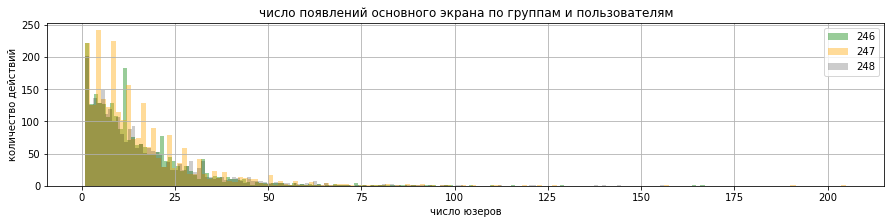

In [33]:
#появление главного экрана
plt.figure(figsize = (15,3))
plt.title('число появлений основного экрана по группам и пользователям')
plt.xlabel("число юзеров")    
plt.ylabel("количество действий")


df[(df.experiment_group == 246) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'green', alpha = 0.4,label='246')
df[(df.experiment_group == 247) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'orange', alpha = 0.4, label='247')
df[(df.experiment_group == 248) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'black', alpha = 0.2, label='248')

plt.legend()

plt.show()

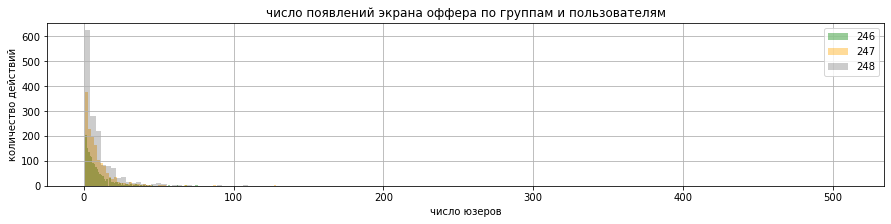

In [34]:
#появление скрина оффера
plt.figure(figsize = (15,3))
plt.title('число появлений экрана оффера по группам и пользователям')
plt.xlabel("число юзеров")    
plt.ylabel("количество действий")
df[(df.experiment_group == 246) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'green', alpha = 0.4, label='246')
df[(df.experiment_group == 247) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'orange', alpha = 0.4,label='247')
df[(df.experiment_group == 248) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'black', alpha = 0.2,label='248')
plt.legend()
plt.show()

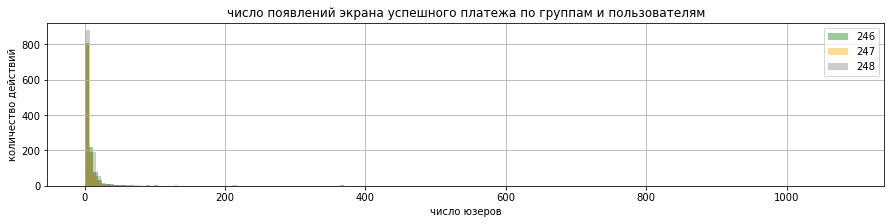

In [35]:
#скрин: "платёж успешен"
plt.figure(figsize = (15,3))
plt.title('число появлений экрана успешного платежа по группам и пользователям')
plt.xlabel("число юзеров")    
plt.ylabel("количество действий")
df[(df.experiment_group == 246) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts().hist(bins = 150, color = 'green', alpha = 0.4,label='246')
df[(df.experiment_group == 247) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts().hist(bins = 150, color = 'orange', alpha = 0.4,label='247')
df[(df.experiment_group == 248) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts().hist(bins = 150, color = 'black', alpha = 0.2,label='248')
plt.legend()
plt.show()

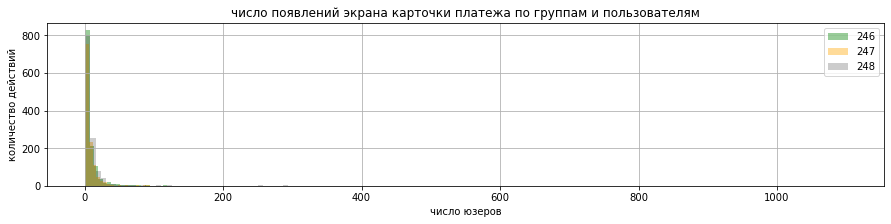

In [36]:
#скрин с указанием карточки платежа
plt.figure(figsize = (15,3))
plt.title('число появлений экрана карточки платежа по группам и пользователям')
plt.xlabel("число юзеров")    
plt.ylabel("количество действий")
df[(df.experiment_group == 246) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'green', alpha = 0.4,label='246')
df[(df.experiment_group == 247) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'orange', alpha = 0.4,label='247')
df[(df.experiment_group == 248) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts().hist(bins = 150, color = 'black', alpha = 0.2,label='248')
plt.legend()
plt.show()

Визуально, данные в различных группах имеют очень близкий характер распределения. Для определения разницы в группах воспользуемся статистическими критериями.

### Вывод

Фрейм очищен от лишних данных по времени фактического начала эксперимента 1 августа. Строки с данными готовы тестам на критерии и проверке гипотез.

## Тесты, выдвижение и проверка гипотез

Определим: находят ли статистические критерии разницу между выборками 246 и 247.

Хоть визуально, данные распределений по целевым действиям и группам откровенно ненормальные, убедимся в этом с помощью статистических критериев. Для этого протестируем данные в группах на нормальлность с помощью критерия Шапиро-Уилка. Упакуем проверку на нормальность в функцию для дальнейшего стремительно мгновенного применения.

In [37]:
def shapiro_fork(array,alph_stat): #передаём функции 2 параметра - массив и уровень значимости критерия

    alpha = alph_stat  # критический уровень статистической значимости

    results = st.shapiro(array)
    p_value = results[1]  

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

H0 - распределение нормально, H1 - распределение не нормально. Критерий возьмём равным 5%.

In [38]:
print('проверяем на нормальность распределение по появлению главного экрана:')
shapiro_fork(df[df.event_name == 'MainScreenAppear']['user_id'].value_counts(),0.05)
print('_____________________________________________________________________________')
print('проверяем на нормальность распределение по появлению экрана оффера:')
shapiro_fork(df[df.event_name == 'OffersScreenAppear']['user_id'].value_counts(),0.05)
print('_____________________________________________________________________________')
print('проверяем на нормальность распределение по появлению экрана с платёжной картой:')
shapiro_fork(df[df.event_name == 'CartScreenAppear']['user_id'].value_counts(),0.05)
print('_____________________________________________________________________________')
print('проверяем на нормальность распределение по появлению экрана успешного платежа:')
shapiro_fork(df[df.event_name == 'PaymentScreenSuccessful']['user_id'].value_counts(),0.05)

проверяем на нормальность распределение по появлению главного экрана:
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
_____________________________________________________________________________
проверяем на нормальность распределение по появлению экрана оффера:
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
_____________________________________________________________________________
проверяем на нормальность распределение по появлению экрана с платёжной картой:
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
_____________________________________________________________________________
проверяем на нормальность распределение по появлению экрана успешного платежа:
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Данные распределения числа действий каждого пользователя ненормальны, распределение имеет вид близкого к Пуассоновскому. Для исследования статистических различий (сходства) воспользуемся непараметрическим тестом Манна-Уитни - односторонний по характеру распределения.

аналогично упакуем тест в функцию c 3мя параметрами: проверяемые массивы (2 штуки) и уровень стат значимости

In [39]:
def man_witney_will_cock(array1,array2,alpha_stat):
    alpha = alpha_stat
    results = st.mannwhitneyu(array1, array2)
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

In [40]:
bonferroni_alpha = 0.05 / 4

Проверим (по очереди) данные по группам 246 и 247 для определения корректности данных в группах. H0 - массивы не имеют статистически значимых различий. H1 -  статистически важные различия присутствуют. Уровень альфа - 5% (в следующих проверках аналогично).

In [41]:
print('проверяем на статиистически значимые отличия распределения по группам 246, 247 в срезе появления главного экрана:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 247) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 246, 247 в срезе появления экрана оффера:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 247) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 246, 247 в срезе появления экрана карточки:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 247) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 246, 247 в срезе появления экрана платежа:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    df[(df.experiment_group == 247) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    bonferroni_alpha)



проверяем на статиистически значимые отличия распределения по группам 246, 247 в срезе появления главного экрана:
p-значение:  0.3152185241813237
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам 246, 247 в срезе появления экрана оффера:
p-значение:  0.4203669449608323
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам 246, 247 в срезе появления экрана карточки:
p-значение:  0.22492761815009388
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяе

***Промежуточный вывод: Данные по группам 246, 247 и по отдельным срезам не имеют статистически значимых различий. A - группа подобрана корректно.***

Теперь проверим данные по группам A/B, 246 и 248. H0 - массивы не имеют статистически значимых различий. H1 -  статистически важные различия присутствуют.

In [42]:
print('проверяем на статиистически значимые отличия распределения по группам 246, 248 в срезе появления главного экрана:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 246, 248 в срезе появления экрана оффера:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 246, 248 в срезе появления экрана карточки:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 246, 248 в срезе появления экрана платежа:')
man_witney_will_cock(df[(df.experiment_group == 246) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    bonferroni_alpha)

проверяем на статиистически значимые отличия распределения по группам 246, 248 в срезе появления главного экрана:
p-значение:  0.04772774912436444
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам 246, 248 в срезе появления экрана оффера:
p-значение:  0.36127590073525373
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам 246, 248 в срезе появления экрана карточки:
p-значение:  0.04744500848786426
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
провер

***Промежуточный вывод: Данные по группам 246, 248  по срезам "появление экрана оффера", "появление экрана платежа" не имеют статистически значимых различий. ***

Теперь исследуем срезы по группам 247 и 248 на тот же предмет. H0 - массивы не имеют статистически значимых различий. H1 -  статистически важные различия присутствуют.

In [43]:
print('проверяем на статиистически значимые отличия распределения по группам 247, 248 в срезе появления главного экрана:')
man_witney_will_cock(df[(df.experiment_group == 247) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 247, 248 в срезе появления экрана оффера:')
man_witney_will_cock(df[(df.experiment_group == 247) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 247, 248 в срезе появления экрана карточки:')
man_witney_will_cock(df[(df.experiment_group == 247) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам 247, 248 в срезе появления экрана платежа:')
man_witney_will_cock(df[(df.experiment_group == 247) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    df[(df.experiment_group == 248) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    bonferroni_alpha)

проверяем на статиистически значимые отличия распределения по группам 247, 248 в срезе появления главного экрана:
p-значение:  0.12272818692719328
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам 247, 248 в срезе появления экрана оффера:
p-значение:  0.44403120484144143
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам 247, 248 в срезе появления экрана карточки:
p-значение:  0.006561357941209559
Отвергаем нулевую гипотезу: разница статистически значима
_____________________________________________________________________________________________________________
проверяем на статиисти

Промежуточный вывод: Данные по группам 247, 248 по срезу "появление экрана платежа" не имеют статистически значимых различий.

***Тесты Манна_Уитни показали сходство двух тестовых групп в части появления статистически значимых различий в появлении экрана с картой оплаты.***

Создадим поле font_new, где объединим контрольные группы в единый массив. Булево значение True - будет означать принадлежность к группе с новым шрифтом. False - напротив: к группам 246,247 - со старыми шрифтами

In [44]:
groups_numbers = [246,247]
df['font_new'] = df['experiment_group'].isin(groups_numbers) != True

In [45]:
df.query('experiment_group == 248') #проверяем данные

,event_name,user_id,event_time,experiment_group,event_time_dt,event_date,font_new
2844,MainScreenAppear,4613461174774205834,1564618471,248,2019-08-01 00:14:31,2019-08-01,True
2845,MainScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01,True
2846,CartScreenAppear,4613461174774205834,1564618474,248,2019-08-01 00:14:34,2019-08-01,True
2847,PaymentScreenSuccessful,4613461174774205834,1564618483,248,2019-08-01 00:14:43,2019-08-01,True
2848,OffersScreenAppear,4613461174774205834,1564618491,248,2019-08-01 00:14:51,2019-08-01,True
...,...,...,...,...,...,...,...
244082,MainScreenAppear,8249271441488197538,1565211813,248,2019-08-07 21:03:33,2019-08-07,True
244084,OffersScreenAppear,8249271441488197538,1565211823,248,2019-08-07 21:03:43,2019-08-07,True
244109,MainScreenAppear,5317814261427487562,1565212162,248,2019-08-07 21:09:22,2019-08-07,True
244110,OffersScreenAppear,5317814261427487562,1565212167,248,2019-08-07 21:09:27,2019-08-07,True


In [46]:
print('проверяем на статиистически значимые отличия распределения по группам с изменениями шрифта и без в срезе появления главного экрана:')
man_witney_will_cock(df[(df.font_new == False) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    df[(df.font_new == True) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам с изменениями шрифта и без в срезе появления экрана оффера:')
man_witney_will_cock(df[(df.font_new == False) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    df[(df.font_new == True) & (df.event_name == 'OffersScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам с изменениями шрифта и без в срезе появления экрана карточки:')
man_witney_will_cock(df[(df.font_new == False) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    df[(df.font_new == True) & (df.event_name == 'CartScreenAppear')]['user_id'].value_counts(),
                    bonferroni_alpha)
print('_____________________________________________________________________________________________________________')
print('проверяем на статиистически значимые отличия распределения по группам с изменениями шрифта и без в срезе появления экрана платежа:')
man_witney_will_cock(df[(df.font_new == False) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    df[(df.font_new == True) & (df.event_name == 'PaymentScreenSuccessful')]['user_id'].value_counts(),
                    bonferroni_alpha)

проверяем на статиистически значимые отличия распределения по группам с изменениями шрифта и без в срезе появления главного экрана:
p-значение:  0.05111875716621501
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам с изменениями шрифта и без в срезе появления экрана оффера:
p-значение:  0.38706756774279616
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
_____________________________________________________________________________________________________________
проверяем на статиистически значимые отличия распределения по группам с изменениями шрифта и без в срезе появления экрана карточки:
p-значение:  0.008442386613539781
Отвергаем нулевую гипотезу: разница статистически значима
______________________________________________________________________________

В целом альфа значение критерия в 5% даёт читаемые результаты при полученных p-значениях. Изменение альфы, например, до 13% внесёт больше грязи, хотя сделает статистически важной разницу в срезе по появлению экрана успешного платежа.

***Промежуточные выводы:*** Видны различия в срезе по действию появления первоначального (главного) экрана и появления экрана карты (на оплату)

### Вывод

In [47]:
print('доля пользователей группы, увидевших первый экран со старым шрифтом группа 246:',(df[(df.experiment_group == 246) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts().size 
                                                    / df[df.experiment_group == 246]['user_id'].value_counts().size))

print('доля пользователей группы, увидевших первый экран со старым шрифтом группа 247:',(df[(df.experiment_group == 247) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts().size 
                                                    / df[df.experiment_group == 247]['user_id'].value_counts().size))                   

print('доля пользователей группы, увидевших первый экран  с  новым шрифтом группа 248:',(df[(df.experiment_group == 248) & (df.event_name == 'MainScreenAppear')]['user_id'].value_counts().size 
                                                    / df[df.experiment_group == 248]['user_id'].value_counts().size))                     
                     

доля пользователей группы, увидевших первый экран со старым шрифтом группа 246: 0.9863123993558777
доля пользователей группы, увидевших первый экран со старым шрифтом группа 247: 0.9852472089314195
доля пользователей группы, увидевших первый экран  с  новым шрифтом группа 248: 0.9826566811194324


Исходя из анализа данных доли пользователей, первоначально увидевших заглавный экран, доля из экспериментальной группы с новым шрифтом на 0,3 процентных пункта ниже, нежели из групп со старыми шрифтами. И эта разница статистически значима. Однако рассмотрим воронки: с новыми и старыми шрифтами:

In [48]:
funn = df[df['font_new'] ==  False].groupby('event_name')['user_id'].nunique() #срез по полю "font_new" с значением False - старый шрифт
funn = funn[funn.index != 'Tutorial'].reset_index().sort_values(by = 'user_id', ascending = False)
plt.figure(figsize = (4,2))
fig = go.Figure(
    go.Funnel(
        y=['Появление главного экрана','Скрин оффера','Появление скрина оплаты','Скрин успешной оплаты'],
        x=funn['user_id']))

fig.show() 

<Figure size 288x144 with 0 Axes>

In [49]:
funn

,event_name,user_id
1,MainScreenAppear,4921
2,OffersScreenAppear,3061
0,CartScreenAppear,2503
3,PaymentScreenSuccessful,2357


In [50]:
funn = df[df['font_new'] ==  True].groupby('event_name')['user_id'].nunique() #срез по полю "font_new" с значением False - старый шрифт
funn = funn[funn.index != 'Tutorial'].reset_index().sort_values(by = 'user_id', ascending = False)
plt.figure(figsize = (4,2))
fig = go.Figure(
    go.Funnel(
        y=['Появление главного экрана','Скрин оффера','Появление скрина оплаты','Скрин успешной оплаты'],
        x=funn['user_id']))

fig.show() 

<Figure size 288x144 with 0 Axes>

На этапе появления скрина оплаты мы видим разницу, при том, что доля перешедших по воронке от оффера к оплате и от главного экрана к оплате (initial) выросла на 2%, при том, что эта разница статистически значима.

## Общий вывод

В ходе работы проверили 20 (4 семейства) гипотез.
Изменение шрифта приведёт к следующим изменениям.
- доля юзеров, которые посмотрят заглавный экран уменьшится на 0,3 процентных пункта
- вместе с тем, эти изменения окупаются на 3м шаге воронки, увеличивая долю на 2 процентных пункта.
Итоговый скрин оплаты не показывает статистически важных различий, что требует дополнительных изменений для экспериментов. Очевидно, что новый шрифт при прочих равных условиях даёт прирост к итоговой конверсии.


По итогу мы получаем 1,7 процентных пункта неопровергнутого гипотетического роста конверсии после изменения шрифта. Теперь вопросы только к среднему чеку.